<a href="https://colab.research.google.com/github/divyanshibargal/ML-Lab/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=12,
                batch_size=144,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/12
417/417 [==============================] - 5s 10ms/step - loss: 0.2393 - val_loss: 0.1765
Epoch 2/12
417/417 [==============================] - 5s 12ms/step - loss: 0.1588 - val_loss: 0.1425
Epoch 3/12
417/417 [==============================] - 4s 10ms/step - loss: 0.1337 - val_loss: 0.1239
Epoch 4/12
417/417 [==============================] - 4s 10ms/step - loss: 0.1185 - val_loss: 0.1111
Epoch 5/12
417/417 [==============================] - 5s 12ms/step - loss: 0.1076 - val_loss: 0.1018
Epoch 6/12
417/417 [==============================] - 4s 10ms/step - loss: 0.0998 - val_loss: 0.0953
Epoch 7/12
417/417 [==============================] - 4s 10ms/step - loss: 0.0944 - val_loss: 0.0910
Epoch 8/12
417/417 [==============================] - 5s 12ms/step - loss: 0.0907 - val_loss: 0.0879
Epoch 9/12
417/417 [==============================] - 4s 9ms/step - loss: 0.0879 - val_loss: 0.0856
Epoch 10/12
417/417 [==============================] - 4s 10ms/step - loss: 0.0858 - val_los

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


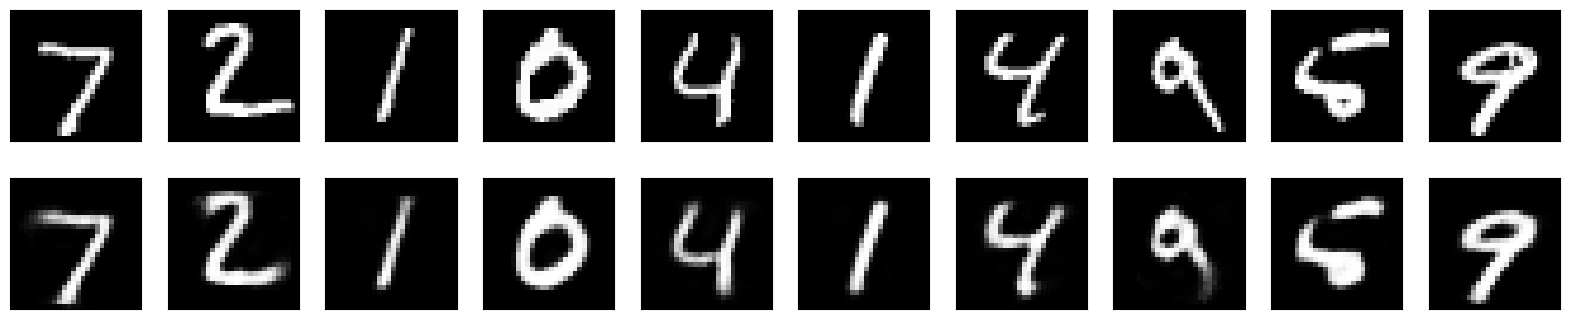

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of the encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


In [11]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 7s 21ms/step - loss: 0.2480 - val_loss: 0.1695
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1527 - val_loss: 0.1360
Epoch 3/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1296 - val_loss: 0.1216
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1194 - val_loss: 0.1152
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1140 - val_loss: 0.1110
Epoch 6/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1105 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1074 - val_loss: 0.1054
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 9/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1025 - val_loss: 0.1006
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1006 - val_lo

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


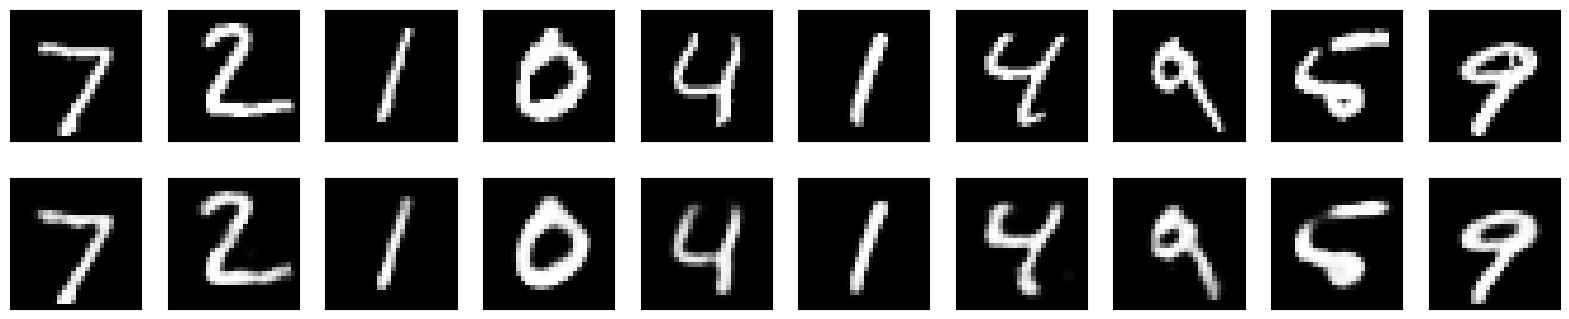

In [14]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()